<a href="https://colab.research.google.com/github/Ilham-0104/Machine_Learning_Data_Science/blob/main/Bag_6_pandas_customer_clustering_ilham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/mall.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df,
                 x = "Spending Score (1-100)",
                 y = "Annual Income (k$)",
                 color = "Genre")

fig.show()

In [ ]:
data = df[["Annual Income (k$)",
           "Spending Score (1-100)"]]

# Elbow Method

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
# Perhitungan Sum of Square Distance untuk menentukan jumlah cluster optimal
distortions = []
inertias = []

for k in range(1, 11):
    kmeanmodel = KMeans(n_clusters = k).fit(data)
    nilai_distorsi = sum(np.min(cdist(data, kmeanmodel.cluster_centers_, "euclidean"), axis=1)) / data.shape[0]
    nilai_inersia = kmeanmodel.inertia_
    distortions.append(nilai_distorsi)
    inertias.append(nilai_inersia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

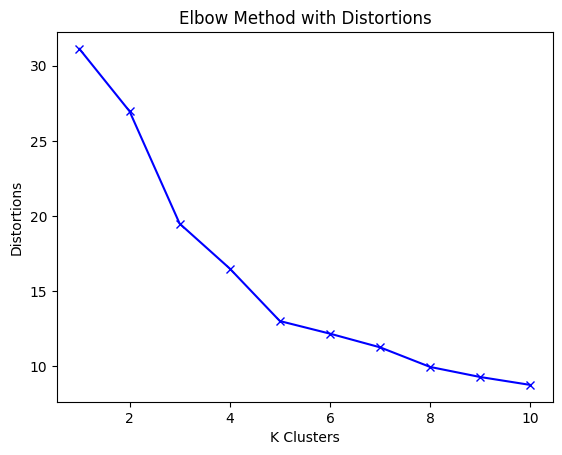

In [ ]:
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel("K Clusters")
plt.ylabel("Distortions")
plt.title("Elbow Method with Distortions")
plt.show()

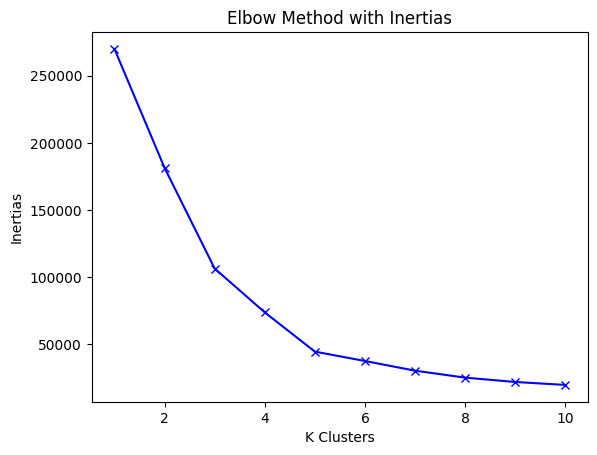

In [ ]:
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel("K Clusters")
plt.ylabel("Inertias")
plt.title("Elbow Method with Inertias")
plt.show()

In [ ]:
model = KMeans(n_clusters = 5, random_state = 42)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [ ]:
pred = model.labels_

In [ ]:
pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
data["Cluster Customer"] = pred.astype(int)
data.head()

<ipython-input-30-9568833f3fc0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Annual Income (k$),Spending Score (1-100),Cluster Customer
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


<ipython-input-31-8236d0a5567c>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



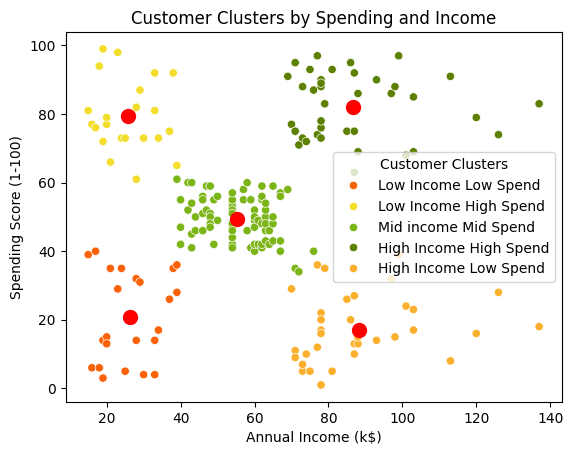

In [ ]:
def set_customer(nomor):
    list_type = ["Mid income Mid Spend",
                "High Income Low Spend",
                "Low Income Low Spend",
                 "Low Income High Spend",
                "High Income High Spend"]

    return list_type[nomor]

data["Customer Type"] = data["Cluster Customer"].apply(set_customer)

color_palette = ["#FB6107", "#F3DE2C", "#7CB518", "#5C8001", "#FBB02D"]

sns.scatterplot(x = "Annual Income (k$)",
                y = "Spending Score (1-100)",
                hue = "Customer Type",
                data= data,
                palette = color_palette)

centroids = model.cluster_centers_

plt.scatter(centroids[:, 0],
            centroids[:, 1],
            c = "red",
            s = 100)

plt.title("Customer Clusters by Spending and Income")

plt.legend(loc = "center right", title="Customer Clusters")
plt.show()

In [ ]:
data["Customer Type"].value_counts() / data.shape[0] *100

Customer Type
Mid income Mid Spend      40.5
High Income High Spend    19.5
High Income Low Spend     17.5
Low Income Low Spend      11.5
Low Income High Spend     11.0
Name: count, dtype: float64